In [9]:
# Importing All required and necessary Libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix

In [11]:
# Importing the Datasets

geo = pd.read_csv("C:Geo_scores.csv")
instance = pd.read_csv("C:instance_scores.csv")
lmbda = pd.read_csv("C:Lambda_wts.csv")
qset = pd.read_csv("C:Qset_tats.csv")
train = pd.read_csv("C:train.csv")
test = pd.read_csv("C:test_share.csv")

In [12]:
# Dataset deminsion

print('geo',geo.shape)
print('***********************************')
print('instance',instance.shape)
print('***********************************')
print('lmbda',lmbda.shape)
print('***********************************')
print('qset',qset.shape)
print('***********************************')
print('train',train.shape)
print('***********************************')
print('test',test.shape)
print('***********************************')

geo (1424035, 2)
***********************************
instance (1424035, 2)
***********************************
lmbda (1400, 2)
***********************************
qset (1424035, 2)
***********************************
train (227845, 28)
***********************************
test (56962, 27)
***********************************


In [13]:
# Dataset Sample

print(geo.head(2))
print('***********************************')
print(instance.head(2))
print('***********************************')
print(lmbda.head(2))
print('***********************************')
print(qset.head(2))
print('***********************************')
print(train.head(2))
print('***********************************')
print(test.head(2))
print('***********************************')

       id  geo_score
0   26674       4.48
1  204314       4.48
***********************************
       id  instance_scores
0  173444            -0.88
1  259378             1.50
***********************************
    Group  lambda_wt
0  Grp936       3.41
1  Grp347      -2.88
***********************************
       id  qsets_normalized_tat
0    9983                  2.41
1  266000                  3.10
***********************************
       id   Group      Per1      Per2      Per3      Per4      Per5      Per6  \
0  112751  Grp169  1.070000  0.580000  0.480000  0.766667  1.233333  1.993333   
1   18495  Grp161  0.473333  1.206667  0.883333  1.430000  0.726667  0.626667   

   Per7      Per8  ...      Dem8      Dem9     Cred1  Cred2     Cred3  \
0  0.34  1.010000  ...  0.680000  0.726667  0.606667   1.01  0.933333   
1  0.81  0.783333  ...  0.716667  0.743333  0.680000   0.69  0.560000   

      Cred4     Cred5     Cred6  Normalised_FNT  Target  
0  0.603333  0.686667  0.673333

In [14]:
# Dataset Info

print(geo.info())
print('***********************************')
print(instance.info())
print('***********************************')
print(lmbda.info())
print('***********************************')
print(qset.info())
print('***********************************')
print(train.info())
print('***********************************')
print(test.info())
print('***********************************')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
***********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1424035 non-null  int64  
 1   instance_scores  1424035 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
***********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Group      1400 non-null   object 
 1   l

In [15]:
# Checking Null Values

print('geo',geo['id'].nunique())
print('***********************************')
print('instance',instance['id'].nunique())
print('***********************************')
print('qset',qset['id'].nunique())
print('***********************************')
print('train',train['id'].nunique())
print('***********************************')
print('test',test['id'].nunique())
print('***********************************')
print('lmbda',lmbda['Group'].nunique())
print('***********************************')
print('train',train['Group'].nunique())
print('***********************************')
print('test',test['Group'].nunique())
print('***********************************')

geo 284807
***********************************
instance 284807
***********************************
qset 284807
***********************************
train 227845
***********************************
test 56962
***********************************
lmbda 1400
***********************************
train 1301
***********************************
test 915
***********************************


In [16]:
# Checking Null Values

print(geo.isnull().sum())
print('***********************************')
print(instance.isnull().sum())
print('***********************************')
print(lmbda.isnull().sum())
print('***********************************')
print(qset.isnull().sum())
print('***********************************')
print(train.isnull().sum())
print('***********************************')
print(test.isnull().sum())
print('***********************************')

id               0
geo_score    71543
dtype: int64
***********************************
id                 0
instance_scores    0
dtype: int64
***********************************
Group        0
lambda_wt    0
dtype: int64
***********************************
id                           0
qsets_normalized_tat    103201
dtype: int64
***********************************
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
Target            0
dtype: int64
***********************************
id                0
Gro

In [17]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB


In [18]:
qset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1424035 non-null  int64  
 1   qsets_normalized_tat  1320834 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB


<Axes: ylabel='geo_score'>

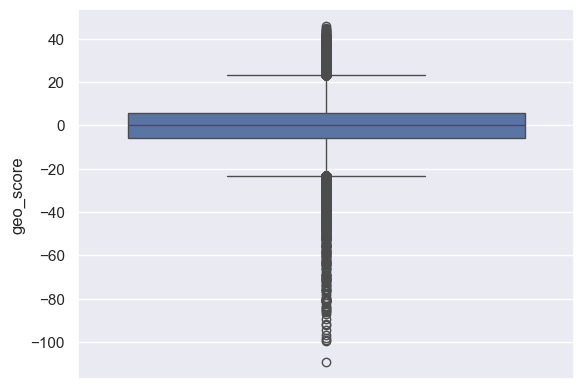

In [19]:
sns.boxplot(y = 'geo_score' , data = geo )

<Axes: ylabel='qsets_normalized_tat'>

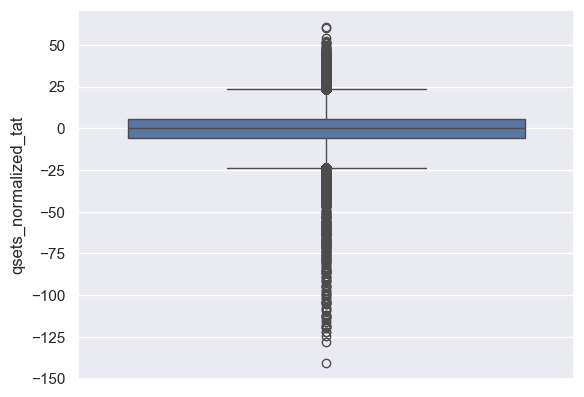

In [20]:
sns.boxplot(y = 'qsets_normalized_tat' , data = qset )

In [21]:
print(geo.isnull().sum()/len(geo)*100)
print("******************")
print(qset.isnull().sum()/len(qset)*100)

id           0.000000
geo_score    5.023964
dtype: float64
******************
id                      0.000000
qsets_normalized_tat    7.247083
dtype: float64


In [22]:
# Filling The null values for geo and qset dataset

geo['geo_score'] = geo['geo_score'].fillna(geo['geo_score'].median())
qset['qsets_normalized_tat'] = qset['qsets_normalized_tat'].fillna(qset['qsets_normalized_tat'].median())

In [23]:
print(geo.isnull().sum()/len(geo)*100)
print("******************")
print(qset.isnull().sum()/len(qset)*100)

id           0.0
geo_score    0.0
dtype: float64
******************
id                      0.0
qsets_normalized_tat    0.0
dtype: float64


In [24]:
# concatenating the train and test dataset for further process
train.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.680000,0.726667,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.716667,0.743333,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0


In [25]:
test.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.626667,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.480000,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.706667,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200


In [26]:
train['Target'].value_counts()

Target
0    227451
1       394
Name: count, dtype: int64

In [27]:
train['data'] = 'train'
test['data'] = 'test'

In [28]:
train.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.726667,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.743333,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0,train


In [29]:
test.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data
0,146574,Grp229,-0.300000,1.540000,0.22,-0.280000,0.57,0.260000,0.70,1.076667,...,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,test
1,268759,Grp141,0.633333,0.953333,0.81,0.466667,0.91,0.253333,1.04,0.550000,...,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,test


In [30]:
# Concatenating 
all_data = pd.concat([train,test],axis = 0)
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train


In [34]:
all_data.tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,NaN,test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,NaN,test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,NaN,test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,NaN,test
56961,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,...,0.670000,0.770000,0.893333,0.586667,0.616667,0.683333,0.650000,-248.4500,NaN,test


In [36]:
# Checking the nuniques values for further grouping

print("*******************Unique ID to the customer****************")
print('geo',geo['id'].nunique())
print('***********************************')
print('instance',instance['id'].nunique())
print('***********************************')
print('qset',qset['id'].nunique())
print('***********************************')
print('all_data',all_data['id'].nunique())
print()

print("*******************Unique Group to the customer****************")
print('lmbda',lmbda['Group'].nunique())
print('***********************************')
print('all_data',all_data['Group'].nunique())
print('***********************************')
print('test',test['Group'].nunique())
print('***********************************')

*******************Unique ID to the customer****************
geo 284807
***********************************
instance 284807
***********************************
qset 284807
***********************************
all_data 284807

*******************Unique Group to the customer****************
lmbda 1400
***********************************
all_data 1400
***********************************
test 915
***********************************


In [37]:
# Grouping the dataset based on group column

geo = geo.groupby('id').mean()
instance = instance.groupby('id').mean()
qset = qset.groupby('id').mean()

In [40]:
geo.shape

(284807, 1)

In [43]:
instance.shape

(284807, 1)

In [44]:
qset.shape

(284807, 1)

In [45]:
lmbda.shape

(1400, 2)

In [46]:
# merging the dataset using grouped column
all_data = pd.merge(all_data , lmbda , on = 'Group' , how = 'left')
all_data = pd.merge(all_data, geo , on = 'id' , how = 'left')
all_data = pd.merge(all_data , instance , on = 'id' , how = 'left')
all_data = pd.merge(all_data , qset , on = 'id' , how = 'left')


In [47]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt,geo_score,instance_scores,qsets_normalized_tat
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,train,-0.13,0.256,-0.06,-0.700
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,train,0.66,-0.250,0.52,0.140
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.51,-0.950,1.56,-0.430
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.72,0.490,0.70,-0.302
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.60,0.850,-0.47,-0.630


In [48]:
# splitting the data for training and testing

train = all_data[all_data['data'] == 'train']
test = all_data[all_data['data'] == 'test']

In [49]:
train.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt,geo_score,instance_scores,qsets_normalized_tat
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,train,-0.13,0.256,-0.06,-0.700
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,train,0.66,-0.250,0.52,0.140
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.51,-0.950,1.56,-0.430
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.72,0.490,0.70,-0.302
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.60,0.850,-0.47,-0.630


In [50]:
test.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt,geo_score,instance_scores,qsets_normalized_tat
227845,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.796667,0.823333,0.783333,-249.7500,NaN,test,0.76,0.25,-0.04,-0.426
227846,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.630000,0.673333,0.673333,-249.8125,NaN,test,0.18,0.43,-0.77,-0.620
227847,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.596667,0.680000,0.670000,-248.1200,NaN,test,0.39,1.32,0.11,-0.406
227848,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.320000,0.676667,0.660000,-222.9875,NaN,test,1.80,-2.11,0.33,0.374
227849,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.546667,0.650000,0.663333,-196.2200,NaN,test,1.89,-2.11,-0.37,-0.130


In [51]:
print('train',train.shape)
print("*******************************")
print("*******************************")
print('test',test.shape)


train (227845, 33)
*******************************
*******************************
test (56962, 33)


In [52]:
train.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'lambda_wt', 'geo_score',
       'instance_scores', 'qsets_normalized_tat'],
      dtype='object')

In [53]:
test.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'lambda_wt', 'geo_score',
       'instance_scores', 'qsets_normalized_tat'],
      dtype='object')

In [54]:
train = train.drop(['id','data'],axis = 1 ) # Building a Model
unseen_test_data = test.drop(['id','data','Target'],axis = 1 ) # prediction and final result

In [55]:
train['Group'] = train['Group'].astype('category')
train['Group'] = train['Group'].cat.codes
train['Group']

0         420
1         413
2         523
3         452
4         486
         ... 
227840    491
227841    453
227842    632
227843    727
227844    393
Name: Group, Length: 227845, dtype: int16

In [56]:
unseen_test_data['Group'] = unseen_test_data['Group'].astype('category')
unseen_test_data['Group'] = unseen_test_data['Group'].cat.codes
unseen_test_data['Group']

227845    277
227846    180
227847    231
227848    485
227849    504
         ... 
284802     11
284803    569
284804    765
284805    163
284806    222
Name: Group, Length: 56962, dtype: int16

In [57]:
# split the data into ind and dep variable
x = train.drop(['Target'],axis = 1)
y = train['Target']

In [58]:
x.columns

Index(['Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8',
       'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8',
       'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'lambda_wt', 'geo_score', 'instance_scores',
       'qsets_normalized_tat'],
      dtype='object')

In [60]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
227840    0.0
227841    0.0
227842    0.0
227843    0.0
227844    0.0
Name: Target, Length: 227845, dtype: float64

In [61]:
# split the data into training and testing
x_train ,x_test , y_train , y_test = train_test_split(x, y , test_size = 0.2 , random_state = 42 , stratify = y)

In [62]:
# Building Model
rforest = RandomForestClassifier()
rforest =  rforest.fit(x_train, y_train)

In [63]:
y_pred_train =  rforest.predict(x_train)
y_pred_test =  rforest.predict(x_test)

In [64]:
print(classification_report(y_train,y_pred_train))
print('***************************')
print('***************************')
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276

***************************
***************************
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.95      0.73      0.83        79

    accuracy                           1.00     45569
   macro avg       0.98      0.87      0.91     45569
weighted avg       1.00      1.00      1.00     45569



In [65]:
print(accuracy_score(y_train,y_pred_train))
print('***************************')
print('***************************')
print(accuracy_score(y_test,y_pred_test))

0.9999945138142158
***************************
***************************
0.9994733261647173


In [66]:
# Check underfitting and overfitting problem (high bias or high variance problem)- Bias-Variance Trade off
pred_eva_train = rforest.predict(x_train)
pred_eva_test = rforest.predict(x_test)
accuracy_eva_train = accuracy_score(y_train,y_pred_train)
accuracy_eva_test = accuracy_score(y_test,y_pred_test)


print('********************')
print('accuracy_eva_train:',accuracy_eva_train)
print('********************')
print('accuracy_eva_test:',accuracy_eva_test)

********************
accuracy_eva_train: 0.9999945138142158
********************
accuracy_eva_test: 0.9994733261647173


In [67]:
# Cross Validation

from sklearn.model_selection import cross_val_score
training = cross_val_score(rforest, x_train, y_train, cv=10)
print("Training Accuracy :", training.mean())
print("***************")
print("Testb Accuracy :",accuracy_eva_test)

Training Accuracy : 0.999511728140517
***************
Testb Accuracy : 0.9994733261647173


In [68]:
print("************************")
print("Training Accuracy :",classification_report(y_train, pred_eva_train))
print("************************")
print("Testb Accuracy :",classification_report(y_test, pred_eva_test))

************************
Training Accuracy :               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276

************************
Testb Accuracy :               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.95      0.73      0.83        79

    accuracy                           1.00     45569
   macro avg       0.98      0.87      0.91     45569
weighted avg       1.00      1.00      1.00     45569



In [69]:
print("************************")
print(confusion_matrix(y_train, pred_eva_train))
print("************************")
print(confusion_matrix(y_test, pred_eva_test))

************************
[[181961      0]
 [     1    314]]
************************
[[45487     3]
 [   21    58]]


In [70]:
final_output = rforest.predict(unseen_test_data)
final_output = pd.DataFrame(final_output , columns= ['Target'])
final_output.index = unseen_test_data.index

In [71]:
final_output

,Target
227845,0.0
227846,0.0
227847,0.0
227848,0.0
227849,0.0
...,...
284802,0.0
284803,0.0
284804,0.0
284805,0.0


In [72]:
unseen_test_data['Target'] = final_output['Target']
unseen_test_data.index = final_output.index

In [74]:
unseen_test_data.index = final_output.index

In [87]:
unseen_test_data['Target'].value_counts()

Target
0.0    56879
1.0       83
Name: count, dtype: int64

In [88]:
final_output.value_counts()

Target
0.0       56879
1.0          83
Name: count, dtype: int64

In [89]:
cleaned_data = train.copy()

In [95]:
cleaned_data.to_csv('cleaned_data',index = False)

In [129]:
unseen_test_data.to_csv('unseen_test_data',index = False)